In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [166]:
df = pd.read_csv("F:/diabetes (1).csv") #loading the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [167]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64


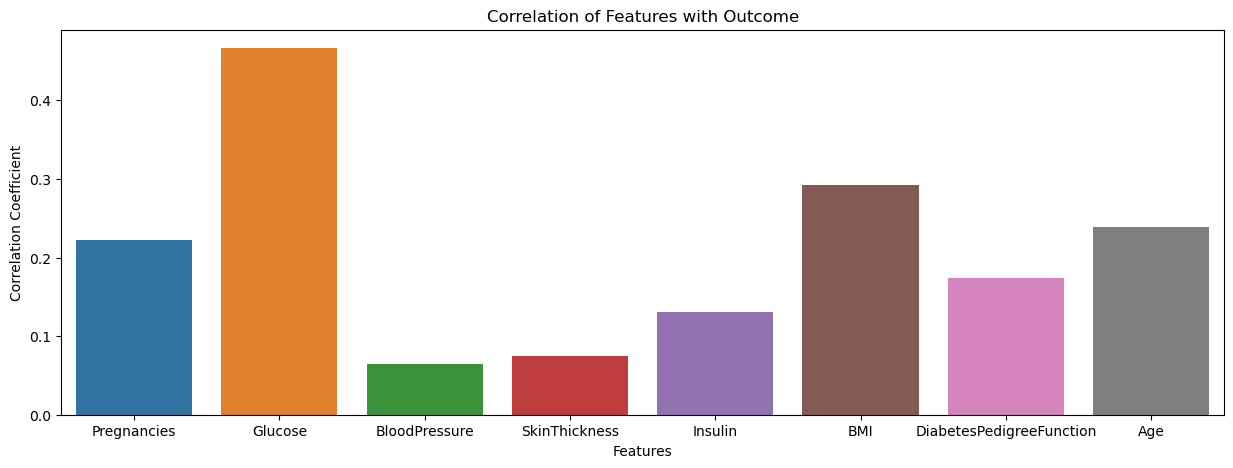

In [168]:
correlation = df.iloc[:, :-1].corrwith(df.iloc[:, -1]) #calculating the correltion of last column with remaining columns 

print(correlation)

# Visualization
plt.figure(figsize = (15, 5))
sns.barplot(x = correlation.index, y = correlation.values)
plt.title('Correlation of Features with Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

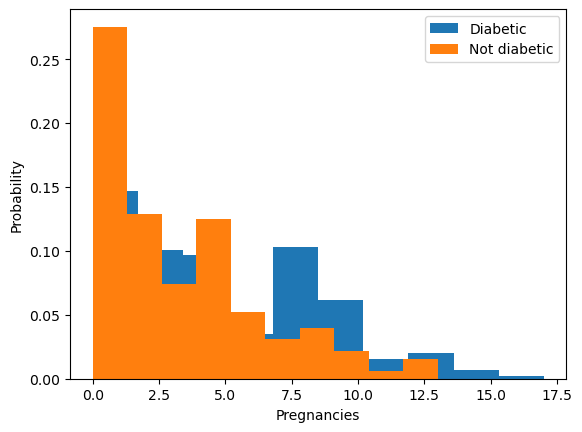

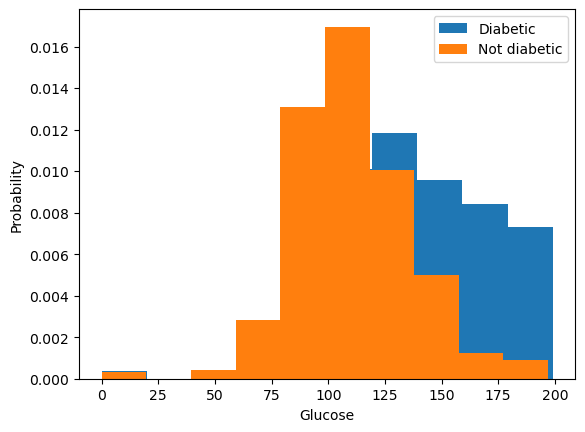

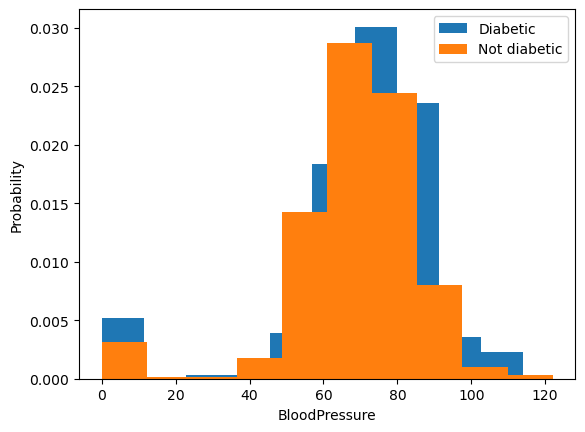

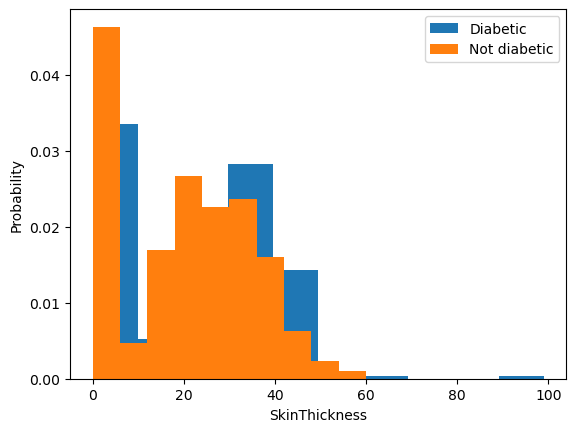

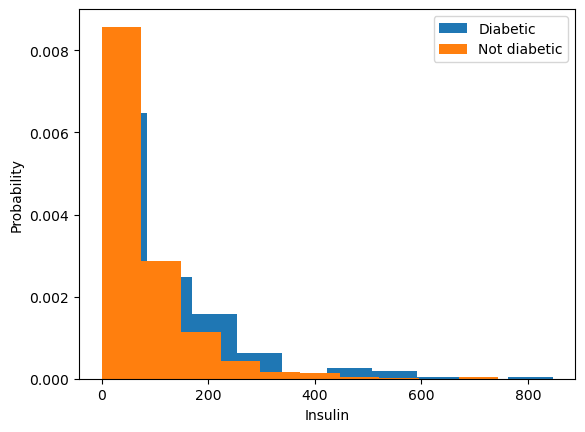

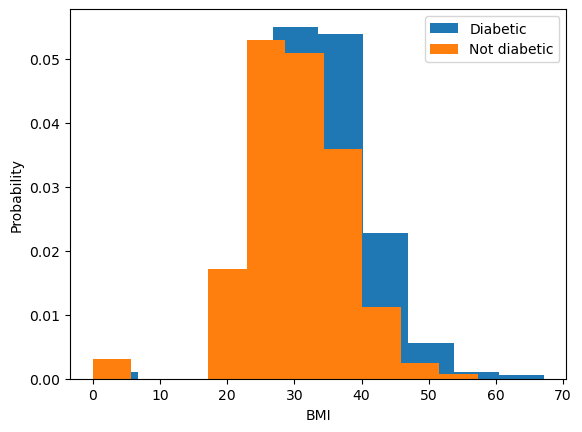

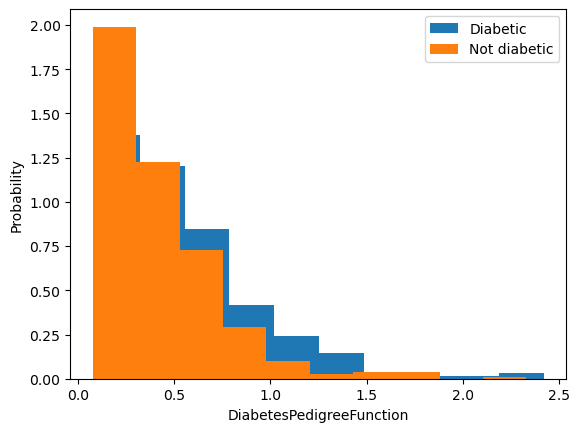

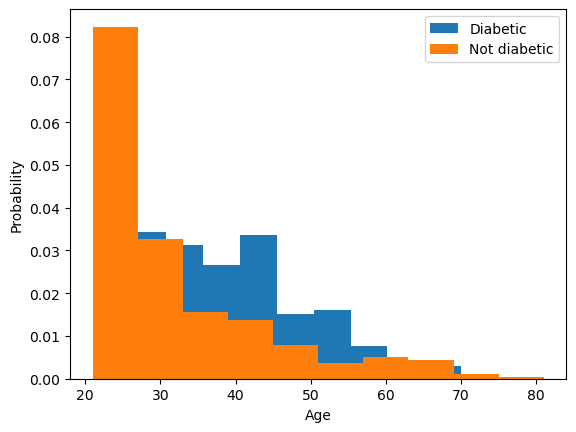

In [169]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], label = 'Diabetic', density = True)
    plt.hist(df[df['Outcome'] == 0][label], label = 'Not diabetic', density = True)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [170]:
# Normalization the dataset
scaler = MinMaxScaler() # MinMaxScaler object

normalized_data = scaler.fit_transform(df) # Normalize the data

# Convert the result back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns = df.columns)
normalized_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [171]:
train, valid, test = np.split(normalized_df.sample(frac = 1), [int(0.6*len(normalized_df)), int(0.8*len(normalized_df))])

In [172]:
# creating input and output trainig dataframe
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_train, Y_train
# creating input and output validation dataframe
X_valid, Y_valid = valid.iloc[:,:-1], valid.iloc[:,-1]
X_valid, Y_valid
# creating input and output testing dataframe
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]
X_test, Y_test

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 105     0.058824  0.633166       0.459016       0.292929  0.179669  0.427720   
 186     0.470588  0.909548       0.557377       0.363636  0.585106  0.448584   
 74      0.058824  0.396985       0.614754       0.303030  0.000000  0.476900   
 99      0.058824  0.613065       0.737705       0.515152  0.260047  0.740686   
 88      0.882353  0.683417       0.573770       0.323232  0.130024  0.552906   
 ..           ...       ...            ...            ...       ...       ...   
 504     0.176471  0.482412       0.639344       0.393939  0.000000  0.555887   
 695     0.411765  0.713568       0.737705       0.242424  0.567376  0.453055   
 290     0.000000  0.391960       0.721311       0.292929  0.047281  0.549925   
 683     0.235294  0.628141       0.655738       0.000000  0.000000  0.481371   
 60      0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
 
      DiabetesPedigreeFunc

# kNN Algorithm

In [173]:
kNN_model = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
kNN_model.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [174]:
Y_predict = kNN_model.predict(X_test)
Y_predict

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [175]:
Y_test

105    0.0
186    1.0
74     0.0
99     1.0
88     1.0
      ... 
504    0.0
695    1.0
290    0.0
683    1.0
60     0.0
Name: Outcome, Length: 154, dtype: float64

In [176]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.66      0.63      0.65        49

    accuracy                           0.78       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154



# NaiveBayes Theorem

In [177]:
from sklearn.naive_bayes import GaussianNB

In [178]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [179]:
Y_pred = nb_model.predict(X_test)
Y_pred

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0.])

In [180]:
Y_test

105    0.0
186    1.0
74     0.0
99     1.0
88     1.0
      ... 
504    0.0
695    1.0
290    0.0
683    1.0
60     0.0
Name: Outcome, Length: 154, dtype: float64

In [182]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       105
         1.0       0.64      0.69      0.67        49

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.78      0.78       154



# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [185]:
Y_pred = lr_model.predict(X_test)
Y_pred

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [186]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       105
         1.0       0.71      0.49      0.58        49

    accuracy                           0.77       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154

